In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import tensorflow as tf 
tf.random.set_seed(7)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df=pd.read_csv('Final _model_with_uniform_inleakage.csv')
df= df.interpolate('linear')
df['Inleakage_data(l/min)'] = df['Inleakage_data(l/min)'].apply(pd.to_numeric, errors='coerce')
df = df.fillna(method='bfill')
#df_input= df[['date','HK4256U','R_H','Precipitation','Eto','Infiltration(l/min)','HK4004U']]
df = df.iloc[0:810,:]
df

,date,R_H,Precipitation,Eto,HK4004U,HK4256U,HK4226B,HK4258U,Infiltration(l/min),KB_2,Inleakage_data(l/min),Lerum_10
0,9/4/2018,89,0.0,1.71,19.595,26.245,17.500000,17.590000,0.0,51.53,0.000000,126.45
1,9/5/2018,83,0.0,1.80,19.570,26.210,17.542222,17.656667,0.0,51.53,0.000000,126.43
2,9/6/2018,87,0.0,2.29,19.560,26.190,17.584444,17.723333,0.0,51.52,0.000000,126.41
3,9/7/2018,78,14.9,1.92,19.550,26.190,17.626667,17.790000,0.0,51.50,0.000000,126.40
4,9/8/2018,85,9.1,1.90,19.780,26.270,17.668889,17.856667,0.0,51.59,0.000000,126.55
...,...,...,...,...,...,...,...,...,...,...,...,...
805,11/17/2020,93,12.4,0.37,19.810,23.870,18.690000,18.800000,0.0,52.17,4.289388,127.22
806,11/18/2020,97,7.0,0.42,19.880,24.300,18.780000,18.970000,0.0,52.29,4.321156,127.36
807,11/19/2020,93,1.5,1.04,19.910,24.470,18.880000,19.080000,0.0,52.33,4.352925,127.38
808,11/20/2020,61,5.4,0.76,19.870,24.520,18.880000,19.080000,0.0,52.29,4.384694,127.35


array([<AxesSubplot:ylabel='Density'>], dtype=object)

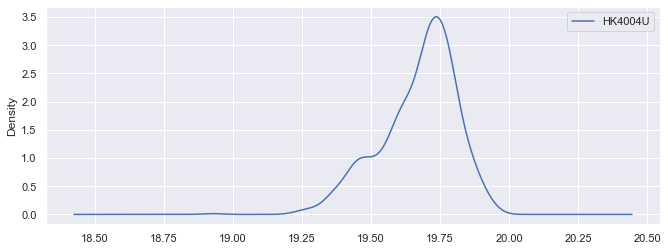

In [286]:
df[['HK4004U']].plot(kind='kde',subplots = True)

In [212]:
df_input= df[['date','HK4004U','R_H','Precipitation','Eto','Infiltration(l/min)','Inleakage_data(l/min)']]
#df = df.iloc[:,:]
df_input

,date,HK4004U,R_H,Precipitation,Eto,Infiltration(l/min),Inleakage_data(l/min)
0,9/4/2018,19.595,89,0.0,1.71,0.0,0.000000
1,9/5/2018,19.570,83,0.0,1.80,0.0,0.000000
2,9/6/2018,19.560,87,0.0,2.29,0.0,0.000000
3,9/7/2018,19.550,78,14.9,1.92,0.0,0.000000
4,9/8/2018,19.780,85,9.1,1.90,0.0,0.000000
...,...,...,...,...,...,...,...
805,11/17/2020,19.810,93,12.4,0.37,0.0,4.289388
806,11/18/2020,19.880,97,7.0,0.42,0.0,4.321156
807,11/19/2020,19.910,93,1.5,1.04,0.0,4.352925
808,11/20/2020,19.870,61,5.4,0.76,0.0,4.384694


<AxesSubplot:ylabel='Density'>

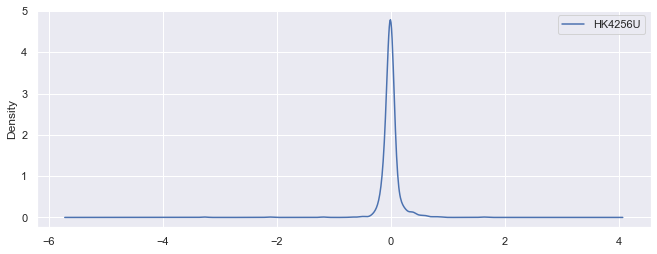

In [285]:
df_new= df[['HK4256U']].diff(periods=1)
#df_new.plot()
df_new.plot(kind='kde')
#plt.axhline(df_new['HK4004U'].mean())
#plt.show()

In [214]:
df_new
#df_new.plot(kind='kde')
#plt.axhline(df_input['HK4004U'].mean())
#plt.show()

,HK4256U
0,NaN
1,-0.035
2,-0.020
3,0.000
4,0.080
...,...
805,-0.010
806,0.430
807,0.170
808,0.050


In [215]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   810 non-null    object 
 1   HK4004U                810 non-null    float64
 2   R_H                    810 non-null    int64  
 3   Precipitation          810 non-null    float64
 4   Eto                    810 non-null    float64
 5   Infiltration(l/min)    810 non-null    float64
 6   Inleakage_data(l/min)  810 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 44.4+ KB


In [216]:
train_dates = pd.to_datetime(df['date'])
train_dates


0     2018-09-04
1     2018-09-05
2     2018-09-06
3     2018-09-07
4     2018-09-08
         ...    
805   2020-11-17
806   2020-11-18
807   2020-11-19
808   2020-11-20
809   2020-11-21
Name: date, Length: 810, dtype: datetime64[ns]

In [217]:
cols= list(df_input)[1:7]
cols

['HK4004U',
 'R_H',
 'Precipitation',
 'Eto',
 'Infiltration(l/min)',
 'Inleakage_data(l/min)']

In [218]:
df_for_training = df_input[cols].astype(float)
df_for_training

,HK4004U,R_H,Precipitation,Eto,Infiltration(l/min),Inleakage_data(l/min)
0,19.595,89.0,0.0,1.71,0.0,0.000000
1,19.570,83.0,0.0,1.80,0.0,0.000000
2,19.560,87.0,0.0,2.29,0.0,0.000000
3,19.550,78.0,14.9,1.92,0.0,0.000000
4,19.780,85.0,9.1,1.90,0.0,0.000000
...,...,...,...,...,...,...
805,19.810,93.0,12.4,0.37,0.0,4.289388
806,19.880,97.0,7.0,0.42,0.0,4.321156
807,19.910,93.0,1.5,1.04,0.0,4.352925
808,19.870,61.0,5.4,0.76,0.0,4.384694


In [219]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled

array([[0.65841584, 0.83606557, 0.        , 0.2407932 , 0.        ,
        0.        ],
       [0.63366337, 0.73770492, 0.        , 0.25354108, 0.        ,
        0.        ],
       [0.62376238, 0.80327869, 0.        , 0.32294618, 0.        ,
        0.        ],
       ...,
       [0.97029703, 0.90163934, 0.04285714, 0.14589235, 0.        ,
        0.61503711],
       [0.93069307, 0.37704918, 0.15428571, 0.10623229, 0.        ,
        0.6195258 ],
       [0.89108911, 0.6557377 , 0.38571429, 0.08640227, 0.        ,
        0.62401449]])

In [220]:
trainX = []
trainY = []

n_future = 1 # no. of days we want to predict in  the future
n_past = 14 #no. of days we want to use to predict the future


In [221]:
for i in range(n_past, len(df_for_training_scaled) - n_future - 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future - 1:i+n_future,0])
    

In [222]:
trainX, trainY = np.array(trainX), np.array(trainY) #making the traindatasets an arrayy in this case.

trainX

In [223]:
trainX

array([[[0.65841584, 0.83606557, 0.        , 0.2407932 , 0.        ,
         0.        ],
        [0.63366337, 0.73770492, 0.        , 0.25354108, 0.        ,
         0.        ],
        [0.62376238, 0.80327869, 0.        , 0.32294618, 0.        ,
         0.        ],
        ...,
        [0.93069307, 0.78688525, 0.03714286, 0.32577904, 0.        ,
         0.        ],
        [0.87128713, 0.39344262, 0.21714286, 0.22804533, 0.        ,
         0.        ],
        [0.9009901 , 0.93442623, 0.00857143, 0.26770538, 0.        ,
         0.        ]],

       [[0.63366337, 0.73770492, 0.        , 0.25354108, 0.        ,
         0.        ],
        [0.62376238, 0.80327869, 0.        , 0.32294618, 0.        ,
         0.        ],
        [0.61386139, 0.6557377 , 0.42571429, 0.27053824, 0.        ,
         0.        ],
        ...,
        [0.87128713, 0.39344262, 0.21714286, 0.22804533, 0.        ,
         0.        ],
        [0.9009901 , 0.93442623, 0.00857143, 0.26770538, 0.   

In [224]:
trainX.shape, trainY.shape

((794, 14, 6), (794, 1))

In [225]:
trainY

array([[0.86138614],
       [0.83168317],
       [0.81188119],
       [0.83168317],
       [0.83168317],
       [0.83168317],
       [0.81188119],
       [0.78217822],
       [0.8019802 ],
       [0.77227723],
       [0.76237624],
       [0.74257426],
       [0.75247525],
       [0.73267327],
       [0.79207921],
       [0.83168317],
       [0.8019802 ],
       [0.82178218],
       [0.83168317],
       [0.84158416],
       [0.84158416],
       [0.9009901 ],
       [0.85148515],
       [0.82178218],
       [0.8019802 ],
       [0.78217822],
       [0.78217822],
       [0.76237624],
       [0.74917492],
       [0.7359736 ],
       [0.72277228],
       [0.7029703 ],
       [0.69306931],
       [0.68316832],
       [0.67326733],
       [0.71287129],
       [0.72277228],
       [0.72277228],
       [0.7029703 ],
       [0.82178218],
       [0.8019802 ],
       [0.8019802 ],
       [0.81188119],
       [0.81188119],
       [0.8019802 ],
       [0.79207921],
       [0.77227723],
       [0.782

In [226]:
#model = Sequential()
##model.add(LSTM(128, activation ='relu', input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
#model.add(LSTM(128, activation = 'relu', return_sequences = True))
#model.add(Dropout(0.3))
#model.add(LSTM(64, activation = 'relu', return_sequences = False))
#model.add(Dropout(0.3))
#model.add(Dense(trainY.shape[1]))

In [227]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64,input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True)) # return seq, hidden state for all the input sequence. To take each observatuion into account and hence return sequence is true  
model.add(tf.keras.layers.LeakyReLU(alpha= 0.2))
model.add(tf.keras.layers.LSTM(64,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha= 0.2))
model.add(tf.keras.layers.Dropout(0.3))# to ma1ke
model.add(tf.keras.layers.LSTM(32,return_sequences=False)) #returns only one hidden state back
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [228]:
model.compile(loss=tf.losses.MeanSquaredError(), 
                  optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(trainX,trainY, epochs = 50,batch_size = 10, validation_split = 0.30, shuffle = False)# callbacks = [early_stopping])

Epoch 1/50
56/56 [==============================] - 2s 41ms/step - loss: 0.0865 - mean_absolute_error: 0.2157 - val_loss: 0.0228 - val_mean_absolute_error: 0.1201
Epoch 2/50
56/56 [==============================] - 1s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.1292 - val_loss: 0.0221 - val_mean_absolute_error: 0.1175
Epoch 3/50
56/56 [==============================] - 1s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.1178 - val_loss: 0.0336 - val_mean_absolute_error: 0.1487
Epoch 4/50
56/56 [==============================] - 1s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.1126 - val_loss: 0.0239 - val_mean_absolute_error: 0.1229
Epoch 5/50
56/56 [==============================] - 1s 14ms/step - loss: 0.0218 - mean_absolute_error: 0.1183 - val_loss: 0.0240 - val_mean_absolute_error: 0.1233
Epoch 6/50
56/56 [==============================] - 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.1136 - val_loss: 0.0240 - val_mean_absolute_error: 0.1231
Epoch 7/50
56/56 [====

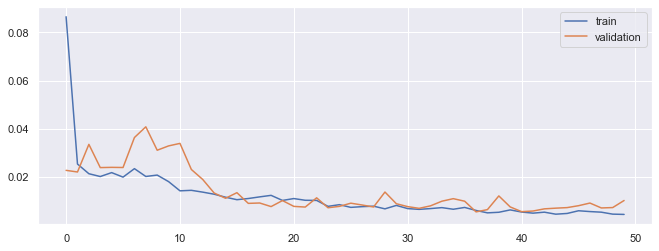

In [230]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show() 

In [269]:
#forecasting 
n_forecast = 7
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods= n_forecast, freq = '1d').tolist()

In [270]:
forecast_period_dates

[Timestamp('2020-11-21 00:00:00', freq='D'),
 Timestamp('2020-11-22 00:00:00', freq='D'),
 Timestamp('2020-11-23 00:00:00', freq='D'),
 Timestamp('2020-11-24 00:00:00', freq='D'),
 Timestamp('2020-11-25 00:00:00', freq='D'),
 Timestamp('2020-11-26 00:00:00', freq='D'),
 Timestamp('2020-11-27 00:00:00', freq='D')]

In [271]:
forecast = model.predict(trainX[-n_forecast:])
        

In [272]:
forecast

array([[0.7613263 ],
       [0.7798495 ],
       [0.77865064],
       [0.79219526],
       [0.80456895],
       [0.8719284 ],
       [0.896019  ]], dtype=float32)

In [273]:
#convert the forecasted data into its original format using inverse transform 
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis =-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:, 0]


In [274]:
forecast_copies

array([[0.7613263 , 0.7613263 , 0.7613263 , 0.7613263 , 0.7613263 ,
        0.7613263 ],
       [0.7798495 , 0.7798495 , 0.7798495 , 0.7798495 , 0.7798495 ,
        0.7798495 ],
       [0.77865064, 0.77865064, 0.77865064, 0.77865064, 0.77865064,
        0.77865064],
       [0.79219526, 0.79219526, 0.79219526, 0.79219526, 0.79219526,
        0.79219526],
       [0.80456895, 0.80456895, 0.80456895, 0.80456895, 0.80456895,
        0.80456895],
       [0.8719284 , 0.8719284 , 0.8719284 , 0.8719284 , 0.8719284 ,
        0.8719284 ],
       [0.896019  , 0.896019  , 0.896019  , 0.896019  , 0.896019  ,
        0.896019  ]], dtype=float32)

In [275]:
y_pred_future


array([19.69894 , 19.71765 , 19.716436, 19.730116, 19.742615, 19.810646,
       19.83498 ], dtype=float32)

In [276]:
#convert timestamps to date
forecast_dates =[]
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [277]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'HK4004U':y_pred_future})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])

In [278]:
df_forecast
df_forecast.to_csv("Fkh4004.csv")

In [279]:
    df_final = df[['date','HK4004U']]
df_final['date'] = pd.to_datetime(df_final['date'])
#df_final = df_final.loc[df_final['date']>= '2020-1-1']
df_final


<ipython-input-279-c14d0ca2ca17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['date'] = pd.to_datetime(df_final['date'])


,date,HK4004U
0,2018-09-04,19.595
1,2018-09-05,19.570
2,2018-09-06,19.560
3,2018-09-07,19.550
4,2018-09-08,19.780
...,...,...
805,2020-11-17,19.810
806,2020-11-18,19.880
807,2020-11-19,19.910
808,2020-11-20,19.870


D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='HK4004U'>

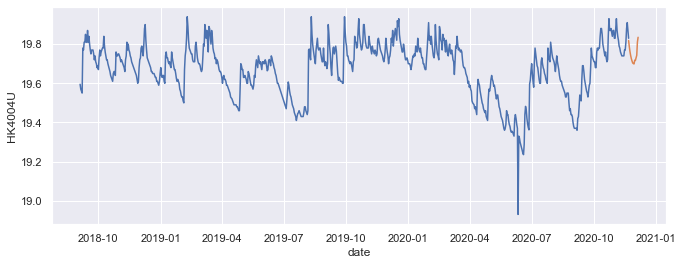

In [268]:
sns.set(rc={'figure.figsize': (11,4)})
sns.lineplot(df_final['date'],df_final['HK4004U'])#.plot()
sns.lineplot(df_forecast['date'], df_forecast['HK4004U'])#.plot()